<a href="https://colab.research.google.com/github/sddaphal/BySpire/blob/master/disease_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install split_folders  

In [ ]:
import splitfolders
input_folder='/content/drive/MyDrive/DRC02/sugarcane-dataset'
output='/content/drive/MyDrive/DRC02/Processed_dataset'
splitfolders.ratio(input_folder, output, seed='1337',ratio=(0.8,0.1,0.1))


In [ ]:
help(splitfolders.ratio)

Help on function ratio in module splitfolders.split:

ratio(input, output='output', seed=1337, ratio=(0.8, 0.1, 0.1), group_prefix=None)



In [ ]:
import pandas as pd
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [ ]:
DATASET="/content/drive/MyDrive/DRC02/Processed_dataset/train"
DATASET2="/content/drive/MyDrive/DRC02/Processed_dataset/val"

CATEGORIES=["cercospora-leafspot","healthy", "helmanthospura-leafspot","redrot","rust", "yellow-leaf-disease"]        


In [ ]:
train_data=[]

for category in CATEGORIES:
        label=CATEGORIES.index(category)
        path=os.path.join(DATASET,category)
        for img_file in os.listdir(path):
            img=cv.imread(os.path.join(path,img_file),1)
            img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
            img=cv.resize(img,(64,64))            
            train_data.append([img,label])
          
test_data=[]

for category in CATEGORIES:
        label=CATEGORIES.index(category)
        path=os.path.join(DATASET2,category)
        for img_file in os.listdir(path):
            img=cv.imread(os.path.join(path,img_file),1)
            img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
            img=cv.resize(img,(64,64))
            test_data.append([img,label])
            
print(len(train_data))
print(len(test_data))            

1174
145


In [ ]:
import random

random.shuffle(train_data)
random.shuffle(test_data)
for lbl in train_data[:6]:
    print(lbl[1])

3
0
5
5
1
4


In [ ]:
X_train=[]
y_train=[]

for features,label in train_data:
    X_train.append(features)
    y_train.append(label)

Y=[]
for i in y_train:
    if i==0:
        Y.append("cercospora-leafspot")
    elif i==1:
        Y.append("healthy")
    elif i==2:
        Y.append("helmanthospura-leafspot")
    elif i==3:
        Y.append("redrot")
    elif i==4:
        Y.append("rust")
    else:
        Y.append("yellow-leaf-disease")

len(X_train),len(y_train)



(1174, 1174)

In [ ]:
X_test=[]
y_test=[]
for features,label in test_data:
    X_test.append(features)
    y_test.append(label)
    
Z=[]
for i in y_test:
    if i==0:
        Z.append("cercospora-leafspot")
    elif i==1:
        Z.append("healthy")
    elif i==2:
        Z.append("helmanthospura-leafspot")
    elif i==3:
        Z.append("redrot")
    elif i==4:
        Z.append("rust")
    else:
        Z.append("yellow-leaf-disease")

len(X_test),len(y_test)

(145, 145)

In [ ]:
X_train=np.array(X_train).reshape(-1,64,64,3)
X_train=X_train/255.0
X_train.shape

(1174, 64, 64, 3)

In [ ]:
X_test=np.array(X_test).reshape(-1,64,64,3)
X_test=X_test/255.0
X_test.shape

(145, 64, 64, 3)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Image Count')

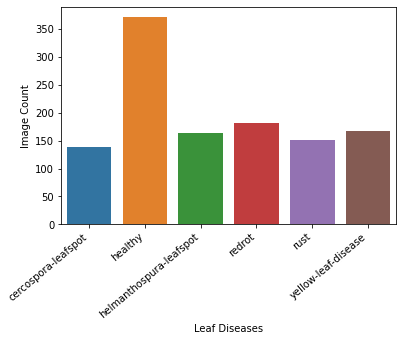

In [ ]:
order=['cercospora-leafspot','healthy','helmanthospura-leafspot','redrot','rust', 'yellow-leaf-disease']
ax=sns.countplot(Y, order=order)
ax.set_xlabel("Leaf Diseases")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
ax.set_ylabel("Image Count")


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Image Count')

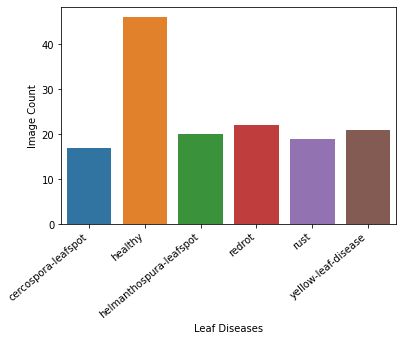

In [ ]:
ax=sns.countplot(Z, order=order)
ax.set_xlabel("Leaf Diseases")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
ax.set_ylabel("Image Count")

In [ ]:
from keras.utils import to_categorical

In [ ]:
one_hot_train=to_categorical(y_train,6)
one_hot_train


array([[0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
one_hot_test=to_categorical(y_test,6)
one_hot_test

array([[0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0.],
       [0.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D,Dropout

In [ ]:
classifier=Sequential()
classifier.add(Conv2D(32,(3,3), input_shape=(64,64,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.2))

classifier.add(Conv2D(64,(3,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.2))

classifier.add(Conv2D(128,(3,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.4))

classifier.add(Flatten())

classifier.add(Dense(activation='relu', units=64))
classifier.add(Dense(activation='relu', units=128))
classifier.add(Dense(activation='relu', units=64))
classifier.add(Dense(activation='softmax', units=6))

classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 128)       7

In [ ]:
hist=classifier.fit(X_train,one_hot_train,epochs=75,batch_size=10,validation_split=0.1)

Epoch 1/75
106/106 [==============================] - 1s 10ms/step - loss: 0.2477 - accuracy: 0.9129 - val_loss: 0.6173 - val_accuracy: 0.8136
Epoch 2/75
106/106 [==============================] - 1s 10ms/step - loss: 0.1718 - accuracy: 0.9347 - val_loss: 0.7223 - val_accuracy: 0.7797
Epoch 3/75
106/106 [==============================] - 1s 9ms/step - loss: 0.2510 - accuracy: 0.9129 - val_loss: 0.8105 - val_accuracy: 0.7627
Epoch 4/75
106/106 [==============================] - 1s 9ms/step - loss: 0.1639 - accuracy: 0.9527 - val_loss: 0.7424 - val_accuracy: 0.7881
Epoch 5/75
106/106 [==============================] - 1s 9ms/step - loss: 0.1451 - accuracy: 0.9479 - val_loss: 0.5859 - val_accuracy: 0.8390
Epoch 6/75
106/106 [==============================] - 1s 9ms/step - loss: 0.1826 - accuracy: 0.9441 - val_loss: 0.6445 - val_accuracy: 0.8220
Epoch 7/75
106/106 [==============================] - 1s 9ms/step - loss: 0.2204 - accuracy: 0.9252 - val_loss: 0.9520 - val_accuracy: 0.7203
Epoc

In [ ]:
test_loss,test_acc=classifier.evaluate(X_test,one_hot_test)
test_loss,test_acc

5/5 [==============================] - 0s 6ms/step - loss: 2.0538 - accuracy: 0.7448


(2.053816795349121, 0.7448275685310364)

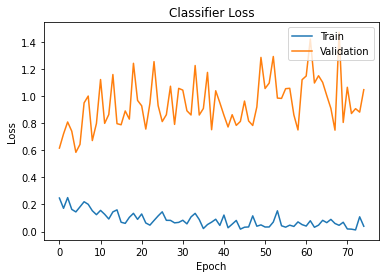

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Classifier Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper right')
plt.show()

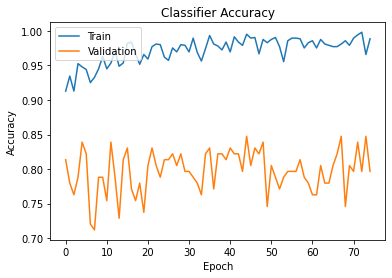

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Classifier Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

In [ ]:
y_pred=classifier.predict_classes(X_test)
y_pred

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([3, 4, 3, 3, 4, 3, 4, 3, 1, 0, 0, 0, 2, 2, 2, 3, 2, 2, 2, 2, 3, 5,
       5, 0, 1, 3, 4, 1, 5, 2, 1, 1, 1, 1, 2, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       2, 0, 1, 1, 5, 1, 0, 1, 1, 3, 4, 1, 1, 1, 5, 1, 4, 1, 3, 4, 3, 1,
       5, 5, 0, 1, 4, 2, 1, 2, 1, 5, 5, 5, 5, 5, 2, 0, 1, 1, 3, 0, 4, 1,
       5, 2, 1, 1, 0, 2, 0, 5, 4, 1, 1, 3, 4, 3, 3, 4, 1, 1, 0, 1, 0, 5,
       1, 0, 1, 1, 5, 3, 0, 2, 2, 1, 1, 3, 0, 2, 1, 3, 1, 1, 5, 1, 0, 3,
       4, 3, 0, 1, 0, 5, 0, 2, 4, 4, 0, 5, 4])

In [ ]:
y_prob=classifier.predict_proba(X_test)
y_prob

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


array([[4.46948252e-05, 6.70378432e-02, 5.00355673e-04, 9.01311815e-01,
        3.10204681e-02, 8.47380943e-05],
       [1.32178699e-04, 2.77030449e-02, 5.46026044e-04, 2.19406662e-04,
        9.69787776e-01, 1.61154137e-03],
       [5.39647632e-11, 2.06015713e-07, 8.40248731e-07, 9.99998927e-01,
        1.12177256e-09, 2.21531571e-09],
       [3.75941704e-06, 8.97184327e-06, 3.35886434e-05, 9.99878407e-01,
        7.44714998e-05, 7.67046402e-07],
       [2.37554559e-10, 4.94930141e-08, 1.39457146e-09, 1.67785814e-07,
        9.99999762e-01, 8.41566122e-11],
       [1.79685369e-01, 1.45294601e-02, 1.88573152e-02, 6.30106807e-01,
        1.56214491e-01, 6.06554269e-04],
       [4.40911717e-05, 2.25570830e-06, 4.57481292e-06, 1.17759764e-05,
        9.99937177e-01, 1.09688493e-07],
       [1.82056858e-08, 1.65916185e-06, 5.53568476e-04, 9.99444544e-01,
        4.33493383e-08, 2.03212352e-07],
       [1.59014562e-05, 9.99877930e-01, 5.54642793e-05, 4.51236338e-05,
        5.54936696e-06, 

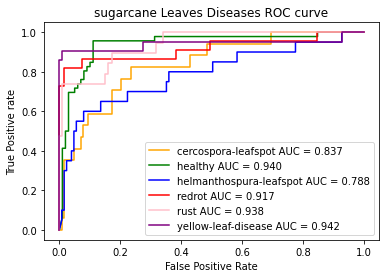

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr = {}
tpr = {}
thresh ={}
roc_auc={}

n_class = 6

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_prob[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])
      
plt.plot(fpr[0], tpr[0], color='orange',label='cercospora-leafspot AUC = %0.3f' % roc_auc[0])
plt.plot(fpr[1], tpr[1], color='green',label='healthy AUC = %0.3f' % roc_auc[1])
plt.plot(fpr[2], tpr[2], color='blue',label='helmanthospura-leafspot AUC = %0.3f' % roc_auc[2])
plt.plot(fpr[3], tpr[3], color='red',label='redrot AUC = %0.3f' % roc_auc[3])
plt.plot(fpr[4], tpr[4], color='pink',label='rust AUC = %0.3f' % roc_auc[4])
plt.plot(fpr[5], tpr[5], color='purple',label='yellow-leaf-disease AUC = %0.3f' % roc_auc[5])
plt.title('sugarcane Leaves Diseases ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

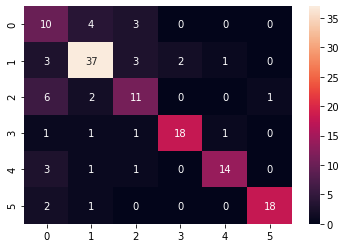

In [ ]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
cm=confusion_matrix(y_test,y_pred)

In [ ]:
from keras.callbacks import ModelCheckpoint

In [ ]:

checkpoint = ModelCheckpoint('sdd_original.h5',  # model filename
                             monitor='val_loss', # quantity to monitor
                             verbose=0, # verbosity - 0 or 1
                             save_best_only= True, # The latest best model will not be overwritten
                             mode='auto') # The decision to overwrite model is made 
                                          # automatically depending on the quantity to monitor

In [ ]:
sequential.compile(loss='categorical_crossentropy', # Better loss function for neural networks
              optimizer=Adam(lr=LEARN_RATE), # Adam optimizer with 1.0e-4 learning rate
              metrics = ['accuracy']) # Metrics to be evaluated by the model

NameError: ignored